In [22]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from datetime import datetime
import time
import json

# 1. DIVIDING DA DATASET

In [23]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("dataquest_fraud_train.csv")
df.sample(4)

,transDate,creditCardNum,business,category,amount,firstName,lastName,gender,street,city,...,latitude,longitude,cityPop,job,dateOfBirth,transNum,unixTime,merchLatitude,merchLongitude,isFraud
132628,2019-10-26 17:26,4149635823017,fraud_Beier-Hyatt,shopping_pos,9.26,Samuel,Farrell,M,428 Michael Tunnel Apt. 377,Cleveland,...,33.9778,-86.5598,3996,Aid worker,1977-06-14,b3963c6228fddc60c6fea3dc6ad6c249,1351272372,34.459327,-87.045266,0
116937,2019-10-19 19:23,4607072969078270,fraud_Wiza LLC,misc_pos,2.53,Brenda,Perez,F,033 Tara Brook Suite 523,Coyle,...,35.8985,-97.2607,1493,Amenity horticulturist,1985-03-21,6652ce3c4570b1b68a2f1d38f290dc3d,1350674621,36.488738,-96.445941,0
74250,2019-09-30 11:34,3592931352252640,fraud_Maggio-Fahey,misc_pos,32.89,Dylan,Garcia,M,923 Jordan Road,Afton,...,44.8696,-92.8234,2916,Barrister's clerk,1935-06-29,2f7ddec180c6db1f0b203ef1977e5514,1349004878,43.880213,-93.138236,0
92415,2019-10-08 6:13,2706977570537520,fraud_Heidenreich PLC,grocery_pos,93.34,David,Serrano,M,4739 Martin Common,Zaleski,...,39.2830,-82.3977,341,Accounting technician,1978-12-18,97f68a8f8b94b68aeaee44c88ebb62ed,1349676782,39.777118,-82.727163,0


In [24]:
# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

# Remove rows where all elements are NaN
df.dropna(how='all', inplace=True)

# Removing firstName, lastName, transNum, creditCardNum columns
df.drop(['firstName', 'lastName', 'transNum', 'creditCardNum', 'street'], axis=1, inplace=True)

# Convert transDate column to datetime format
df['transDate'] = pd.to_datetime(df['transDate'], format='%Y-%m-%d %H:%M')

# Convert transDate to Unix time and create a new unixTime column
df['unixTime'] = df['transDate'].astype('int64') // 10**9
df = df.drop(['transDate'], axis=1)

df.sample(4)

,business,category,amount,gender,city,state,zip,latitude,longitude,cityPop,job,dateOfBirth,unixTime,merchLatitude,merchLongitude,isFraud
26340,fraud_Smitham-Boehm,grocery_net,61.89,F,Grover,NC,28073,35.1836,-81.4552,5621,Toxicologist,1973-11-14,1563510600,35.823365,-80.837304,0
42937,fraud_Harris Inc,gas_transport,58.87,F,Brunson,SC,29911,32.9413,-81.1807,1725,Social researcher,1974-12-05,1565486820,32.717619,-80.688438,0
36573,fraud_Jewess LLC,shopping_pos,119.89,M,Boyd,WI,54726,44.9437,-91.0294,1690,IT trainer,1975-12-24,1563779820,44.798678,-91.262675,0
49215,fraud_Runte-Mohr,food_dining,49.29,M,Rumely,MI,49826,46.3481,-87.0436,137,Film/video editor,1990-08-13,1565627340,46.934807,-87.376376,0


# 2. Catgeorical Data to Numerical Data

## Encoding Catg. Data

In [25]:
# Encoding Gender
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'F' else 1)

# Encoding Age
def calculate_age(birth_date_str):
    birth_date = datetime.strptime(birth_date_str, "%Y-%m-%d")
    today = datetime.now()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age
    
df['age'] = df['dateOfBirth'].apply(calculate_age)
df = df.drop(['dateOfBirth'], axis=1)
df.sample(5)

,business,category,amount,gender,city,state,zip,latitude,longitude,cityPop,job,unixTime,merchLatitude,merchLongitude,isFraud,age
121079,"fraud_Douglas, Schneider and Turner",shopping_pos,259.21,1,Detroit,MI,48221,42.4260,-83.1500,673342,Retail manager,1571626080,42.258262,-82.497045,0,56
130492,fraud_Keeling-Crist,misc_pos,3.00,0,Ruidoso,NM,88355,33.3305,-105.6933,8874,Licensed conveyancer,1572037200,33.604232,-104.730445,0,23
1956,fraud_Skiles LLC,home,15.77,1,Lima,OH,45801,40.7641,-84.0973,86954,"Copywriter, advertising",1562702280,40.995330,-85.018112,0,31
107265,fraud_Jast and Sons,food_dining,19.79,0,Esbon,KS,66941,39.7562,-98.4462,242,Tourism officer,1571080380,40.350794,-97.660312,0,36
132429,fraud_Durgan-Auer,misc_net,84.53,0,Edisto Island,SC,29438,32.5486,-80.3070,2408,"Sales professional, IT",1572105660,32.594353,-79.617395,0,26


# One Hot Encoding Data

In [26]:
"""
print(df.groupby('job').job.count())
print(df.groupby('state').state.count())
print(df.groupby('city').city.count())
print(df.groupby('category').category.count())
print(df.groupby('business').business.count())
"""

#df = pd.get_dummies(df, columns=['job'])
#df = pd.get_dummies(df, columns=['state'])
#df = pd.get_dummies(df, columns=['city'])
df = pd.get_dummies(df, columns=['category'])
#df = pd.get_dummies(df, columns=['business'])

df = df.drop(["job", "state", "city", "business", "zip"], axis=1)
df.sample(5)

,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,isFraud,age,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
49738,135.98,0,44.9913,-92.9487,753116,1565636760,44.763600,-93.797236,0,52,...,0,0,0,0,0,0,1,0,0,0
69108,68.88,0,20.0271,-155.3697,1490,1569695220,19.394478,-154.706787,0,32,...,0,0,0,0,0,0,1,0,0,0
161130,197.24,0,39.1412,-94.3515,123373,1573190580,39.385783,-94.448790,0,31,...,1,0,0,0,0,0,0,0,0,0
18357,7.44,0,38.8582,-76.6145,3289,1563207720,39.517128,-76.431958,0,91,...,0,0,1,0,0,0,0,0,0,0
148371,7.94,1,41.5177,-78.2536,4533,1572711240,41.618477,-78.531827,0,54,...,0,0,0,0,0,0,1,0,0,0


# 3. Adding Features

## Adding distance between transactions

In [27]:
import math
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

# Coordinates of the two points
lat1, lon1 = 37.2692, -82.9161
lat2, lon2 = 37.622362, -82.676007

distanceBetween = []
for index in df.index:
    lat1 = df.iloc[index]["latitude"]
    long1 =  df.iloc[index]["longitude"]
    lat2 = df.iloc[index]["merchLatitude"]
    long2 = df.iloc[index]["merchLongitude"]
    distanceBetween.append(round(haversine(lat1, long1, lat2, long2), 4))

print(distanceBetween[0])
df["distance_between"] = distanceBetween
df.sample(5)
    

85.1941


,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,isFraud,age,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_between
48865,2.18,1,35.5840,-80.8685,69793,1565621040,34.816780,-81.651057,0,70,...,0,0,0,0,0,1,0,0,0,111.0568
70675,54.42,0,39.8127,-120.6405,1725,1569742920,39.308582,-121.283124,0,56,...,0,0,0,0,0,0,0,0,0,78.5938
112980,24.16,1,36.0424,-79.3242,6006,1571354340,35.987162,-79.907997,0,39,...,0,0,1,0,0,0,0,0,0,52.8656
52619,1.62,1,38.2352,-104.6600,151815,1569074340,37.958817,-105.384753,0,36,...,0,0,0,0,0,0,0,0,0,70.4743
159971,7.68,1,42.1239,-79.1895,3833,1573140060,41.550882,-79.322922,0,53,...,0,0,0,0,0,0,1,0,0,64.6683


# 4. Normalizing All Data

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Columns to be expressed as a percentage of their total
PERCENT_OF_TOTAL = ["amount", "cityPop"]

# Columns to be scaled to the range [0, 1]
PERCENT_OF_HIGHEST = ["distance_between", "unixTime", "merchLatitude", "merchLongitude"]

# Calculate the percentage of the total for specified columns
for item in PERCENT_OF_TOTAL:
    total = df[item].sum()
    df[item] = (df[item] / total) * 100  # Convert to percentage

# Normalize specified columns to the range [0, 1]
for item in PERCENT_OF_HIGHEST:
    df[item] = scaler.fit_transform(df[[item]])

df = df.drop(["latitude", "longitude"], axis=1)
df

,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,isFraud,age,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_between
0,0.000032,0,0.453062,0.781827,4.143563e-05,0.000000,0.440700,0.772111,0,78,...,0,0,0,1,0,0,0,0,0,0.572049
1,0.000021,1,0.377596,0.846853,4.925612e-06,0.000000,0.390349,0.842510,0,97,...,0,0,0,0,0,0,1,0,0,0.298690
2,0.000178,0,0.398916,0.437545,2.080114e-06,0.000002,0.420541,0.448314,0,69,...,0,0,0,0,1,0,0,0,0,0.823143
3,0.000074,1,0.499838,0.737319,1.871486e-05,0.000002,0.509176,0.725492,0,59,...,0,0,0,0,1,0,0,0,0,0.507048
4,0.001002,0,0.423638,0.898973,1.188196e-05,0.000008,0.423723,0.885317,0,58,...,0,0,0,0,0,0,0,0,0,0.358400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181817,0.000566,1,0.410888,0.904510,2.660448e-04,0.999998,0.412495,0.892959,0,73,...,0,0,1,0,0,0,0,0,0,0.227643
181818,0.000058,1,0.284249,0.497363,7.662253e-03,0.999998,0.305187,0.496819,0,64,...,0,0,0,0,0,0,0,0,1,0.419812
181819,0.000359,0,0.460480,0.609852,6.172446e-07,1.000000,0.449861,0.599924,0,49,...,0,0,0,0,0,1,0,0,0,0.627880
181820,0.000092,1,0.282517,0.700184,5.865985e-04,1.000000,0.277880,0.694989,0,36,...,0,1,0,0,0,0,0,0,0,0.500155


# 5. Balancing Dataset

In [29]:
# Checking Balance of Fraud to No Fraud
def checkBalance(newDf):
    distribution = newDf.groupby("isFraud").isFraud.count()
    print(distribution)
    print(distribution[0] / (distribution[0] + distribution[1]))
    print(distribution[1] / (distribution[0] + distribution[1]))

checkBalance(df)

isFraud
0    180486
1      1336
Name: isFraud, dtype: int64
0.9926521543047596
0.0073478456952403995


In [30]:
# Oversampling and Undersampling Data

# Separate majority and minority classes
majority_class = df[df.isFraud == 0]
minority_class = df[df.isFraud == 1]

# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,     # sample with replacement
                              n_samples=len(majority_class),    # to match majority class size
                              random_state=123) # reproducible results

# Downsample Majority class
majority_downsampled = resample(majority_class,
                              replace=True,     # sample with replacement
                              n_samples=len(minority_class),    # to match majority class size
                              random_state=123) # reproducible results

# Combine Dataframes
oversampledDf = pd.concat([majority_class, minority_upsampled])
undersampledDf = pd.concat([minority_class, majority_downsampled])

#oversampledDf.isFraud.sample(5), undersampledDf.isFraud.sample(5)
oversampledDf.shape, undersampledDf.shape

((360972, 25), (2672, 25))

In [31]:
# Creating X and Y Training Sets
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(
                                                            oversampledDf.drop("isFraud", axis=1),
                                                            oversampledDf.isFraud,
                                                            test_size=0.2, 
                                                            random_state=0
                                                        )
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(
                                                            undersampledDf.drop("isFraud", axis=1),
                                                            undersampledDf.isFraud,
                                                            test_size=0.2, 
                                                            random_state=0
                                                        )

# 6. FEATURE SELECTION WITH RANDOM FOREST

In [32]:
df.sample(5)

,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,isFraud,age,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_between
151950,0.000110,0,0.399975,0.746673,1.140051e-05,0.880113,0.400329,0.734625,0,35,...,1,0,0,0,0,0,0,0,0,0.448343
66864,0.000486,0,0.535885,1.000000,6.981037e-06,0.774018,0.548570,0.999102,0,64,...,0,0,0,0,0,0,0,0,0,0.679610
8167,0.000405,0,0.348345,0.834246,2.415828e-03,0.552762,0.370566,0.829899,0,29,...,1,0,0,0,0,0,0,0,0,0.572429
71195,0.000048,0,0.374655,0.899858,6.487241e-06,0.778826,0.387634,0.893011,0,47,...,0,0,1,0,0,0,0,0,0,0.272186
63216,0.000188,1,0.548733,0.460566,3.703468e-07,0.768397,0.557432,0.467005,0,82,...,0,0,0,0,0,0,0,0,0,0.471375


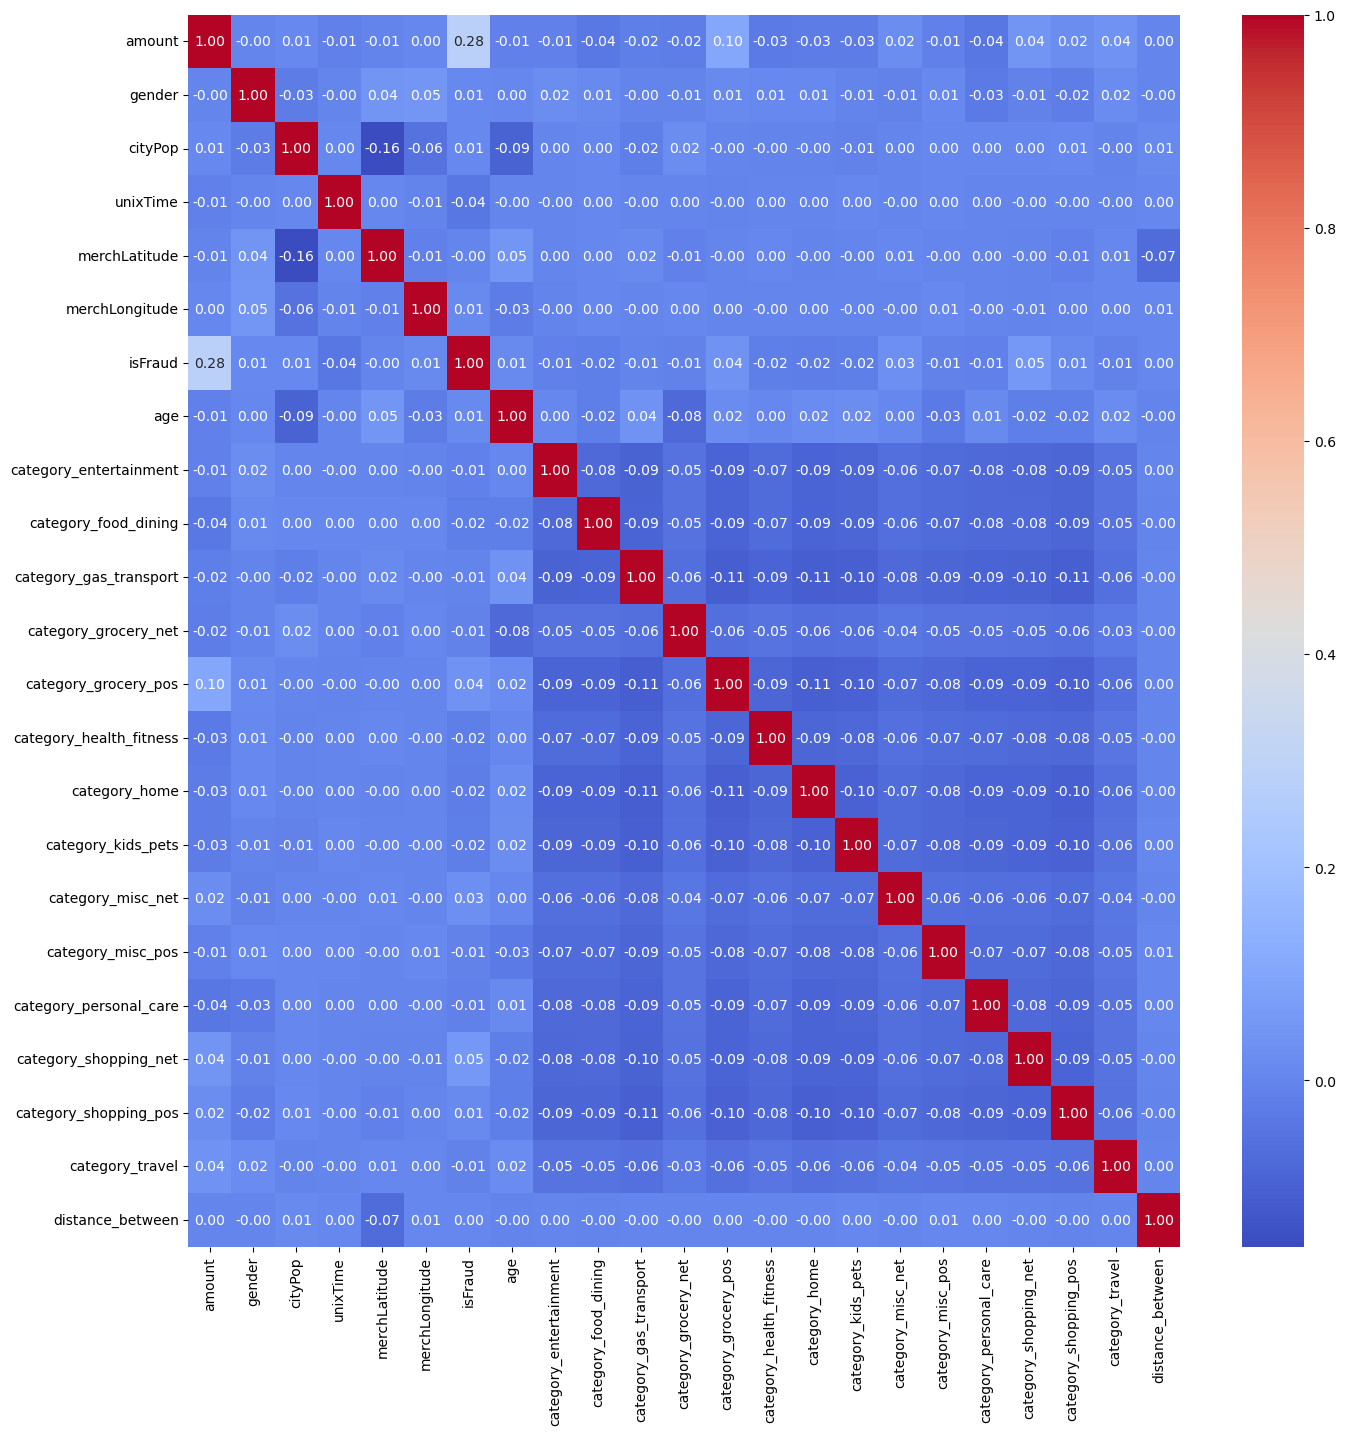

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the matplotlib figure
plt.figure(figsize=(16, 16))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()


In [39]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Fit the RandomForestClassifier
sel = RandomForestClassifier(n_estimators=100)
sel.fit(X_over_train, y_over_train)

# Get the importances of features
importances = sel.feature_importances_

# Set a threshold for feature selection: for instance, the median of importances
threshold_value = np.median(importances)

# Create the SelectFromModel object with your defined threshold
selection = SelectFromModel(sel, threshold=threshold_value)
selection.fit(X_over_train, y_over_train)

# Get the boolean mask of the selected features
selected_features_mask = selection.get_support()

# Get the names of the selected features
selected_features = X_over_train.columns[selected_features_mask]

# Count and print the selected features
print(f"Number of selected features: {selected_features.shape[0]}")
print(selected_features)


Number of selected features: 12
Index(['amount', 'latitude', 'longitude', 'cityPop', 'unixTime',
       'merchLatitude', 'merchLongitude', 'age', 'category_gas_transport',
       'category_grocery_pos', 'category_shopping_net', 'distance_between'],
      dtype='object')


# 7. Model Creation

In [ ]:
X_over